<a href="https://colab.research.google.com/github/noyon57/Newcolab-file/blob/main/metarnal_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



from sklearn.preprocessing import StandardScaler



from featurewiz import featurewiz
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model  import LinearRegression

from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score

from sklearn import metrics




In [ ]:
Pregnency_dataset=pd.read_csv('/content/Maternal Health Risk Data Set.csv')

In [ ]:
Pregnency_dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
Pregnency_dataset.shape

(1014, 7)

In [ ]:
Pregnency_dataset.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
Pregnency_dataset['RiskLevel'].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [ ]:
Pregnency_dataset.groupby('RiskLevel').mean()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
RiskLevel,,,,,,
high risk,36.216912,124.194853,85.073529,12.122610,98.899265,76.742647
low risk,26.869458,105.866995,72.534483,7.220271,98.368966,72.770936
mid risk,28.363095,113.154762,74.232143,7.795744,98.833333,74.175595


In [ ]:
# separating the data and labels
X = Pregnency_dataset.drop(columns = 'RiskLevel', axis=1)
Y = Pregnency_dataset['RiskLevel']

In [ ]:
print(X)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0      25         130           80  15.0      98.0         86
1      35         140           90  13.0      98.0         70
2      29          90           70   8.0     100.0         80
3      30         140           85   7.0      98.0         70
4      35         120           60   6.1      98.0         76
...   ...         ...          ...   ...       ...        ...
1009   22         120           60  15.0      98.0         80
1010   55         120           90  18.0      98.0         60
1011   35          85           60  19.0      98.0         86
1012   43         120           90  18.0      98.0         70
1013   32         120           65   6.0     101.0         76

[1014 rows x 6 columns]


In [ ]:
print(Y)

0       high risk
1       high risk
2       high risk
3       high risk
4        low risk
          ...    
1009    high risk
1010    high risk
1011    high risk
1012    high risk
1013     mid risk
Name: RiskLevel, Length: 1014, dtype: object


train split


In [ ]:
Pregnency_dataset.RiskLevel = le.fit_transform(Pregnency_dataset.RiskLevel.values)


Train accuracy: 0.7063711911357341
Test accuracy: 0.7472527472527473
[0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0
 0 0 1 1 0 2 1 1 1 1 1 0 2 0 0 1 1 0 1 1 0 2 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 1 0 1 0 1 1 2 0 1 0 1 1 1 1 0 1 1]
CM: [[24  4  1]
 [ 0 43  2]
 [ 4 12  1]]
Accuracy: 74.72527472527473 %
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.73      0.96      0.83        45
           2       0.25      0.06      0.10        17

    accuracy                           0.75        91
   macro avg       0.61      0.61      0.59        91
weighted avg       0.68      0.75      0.70        91

recall= 0.6139884306212907
precision= 0.6119854721549637
f1= 0.5880888117730222
mse= 0.4175824175824176
mae= 0.3076923076923077
rmse= 0.646206172658864


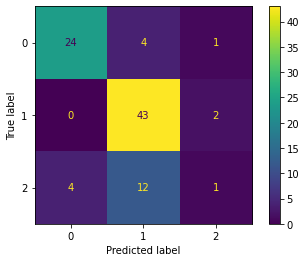

In [ ]:
from sklearn.svm import SVC

#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, y_train)


print("Train accuracy:",svm.score(X_train,y_train))
print("Test accuracy:",svm.score(X_test,y_test))



y_pred = svm.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')



print(metrics.classification_report(y_test, svm.predict(X_test)))


#import result of recall
recall=metrics.recall_score(y_test, y_pred, average="macro")

#import result of precesion
pre=metrics.precision_score(y_test, y_pred, average="macro")


#import result of f1
f1=metrics.f1_score(y_test, y_pred, average="macro")

print('recall=',recall)
print('precision=',pre)
print('f1=',f1)





cm_display = ConfusionMatrixDisplay(cm).plot()
# all score of confusion matrix




#import result of mse
print("mse=",metrics.mean_squared_error(y_test, y_pred))

#import result of mae
print("mae=",metrics.mean_absolute_error(y_test, y_pred))

#import result of rmse
print("rmse=",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1014, 6) (811, 6) (203, 6)


training model

[[45  2 12]
 [ 3 67 32]
 [ 7 12 23]]
              precision    recall  f1-score   support

   high risk       0.82      0.76      0.79        59
    low risk       0.83      0.66      0.73       102
    mid risk       0.34      0.55      0.42        42

    accuracy                           0.67       203
   macro avg       0.66      0.66      0.65       203
weighted avg       0.72      0.67      0.68       203

Accuracy score of the training data :  0.657213316892725
Accuracy score of the test data :  0.6650246305418719
recall= 0.6557312190412888
precision= 0.6628752980328437
f1= 0.6479108233309498


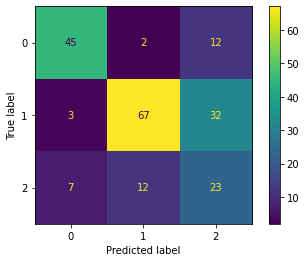

In [ ]:
#svm classifier
from sklearn import svm

classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


#confusion matrix calculation
cm = confusion_matrix(X_test_prediction, Y_test)
print(cm)

cm_display = ConfusionMatrixDisplay(cm).plot()
# all score of confusion matrix
print(metrics.classification_report(X_test_prediction, Y_test))


#accuracy score of training data
print('Accuracy score of the training data : ', training_data_accuracy)


#accuracy score of test data
print('Accuracy score of the test data : ', test_data_accuracy)



#import result of recall
recall=metrics.recall_score(X_test_prediction, Y_test, average="macro")

#import result of precesion
pre=metrics.precision_score(X_test_prediction, Y_test, average="macro")


#import result of f1
f1=metrics.f1_score(X_test_prediction, Y_test, average="macro")

print('recall=',recall)
print('precision=',pre)
print('f1=',f1)





#import result of mse
#print("mse=", metrics.mean_squared_error(X_test_prediction, Y_test))

#import result of mae
#print("mae=", metrics.mean_absolute_error(X_test_prediction, Y_test))

#import result of rmse
#print("rmse=", np.sqrt(metrics.mean_squared_error(X_test_prediction, Y_test)))













Preprocessing work

In [ ]:
Pregnency_dataset

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,0
1010,55,120,90,18.0,98.0,60,0
1011,35,85,60,19.0,98.0,86,0
1012,43,120,90,18.0,98.0,70,0


Preprocessing in dataset


In [ ]:
Pregnency_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


LABEL ENCODER
 object to int

In [ ]:
Pregnency_dataset.RiskLevel = le.fit_transform(Pregnency_dataset.RiskLevel.values)


In [ ]:
Pregnency_dataset['RiskLevel'].value_counts()


1    406
2    336
0    272
Name: RiskLevel, dtype: int64

In [ ]:
Pregnency_dataset.isnull().sum()


Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [ ]:
Pregnency_dataset.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,1.063116
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,0.772146
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,0.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,2.000000


Visualizing aspects of the dataset


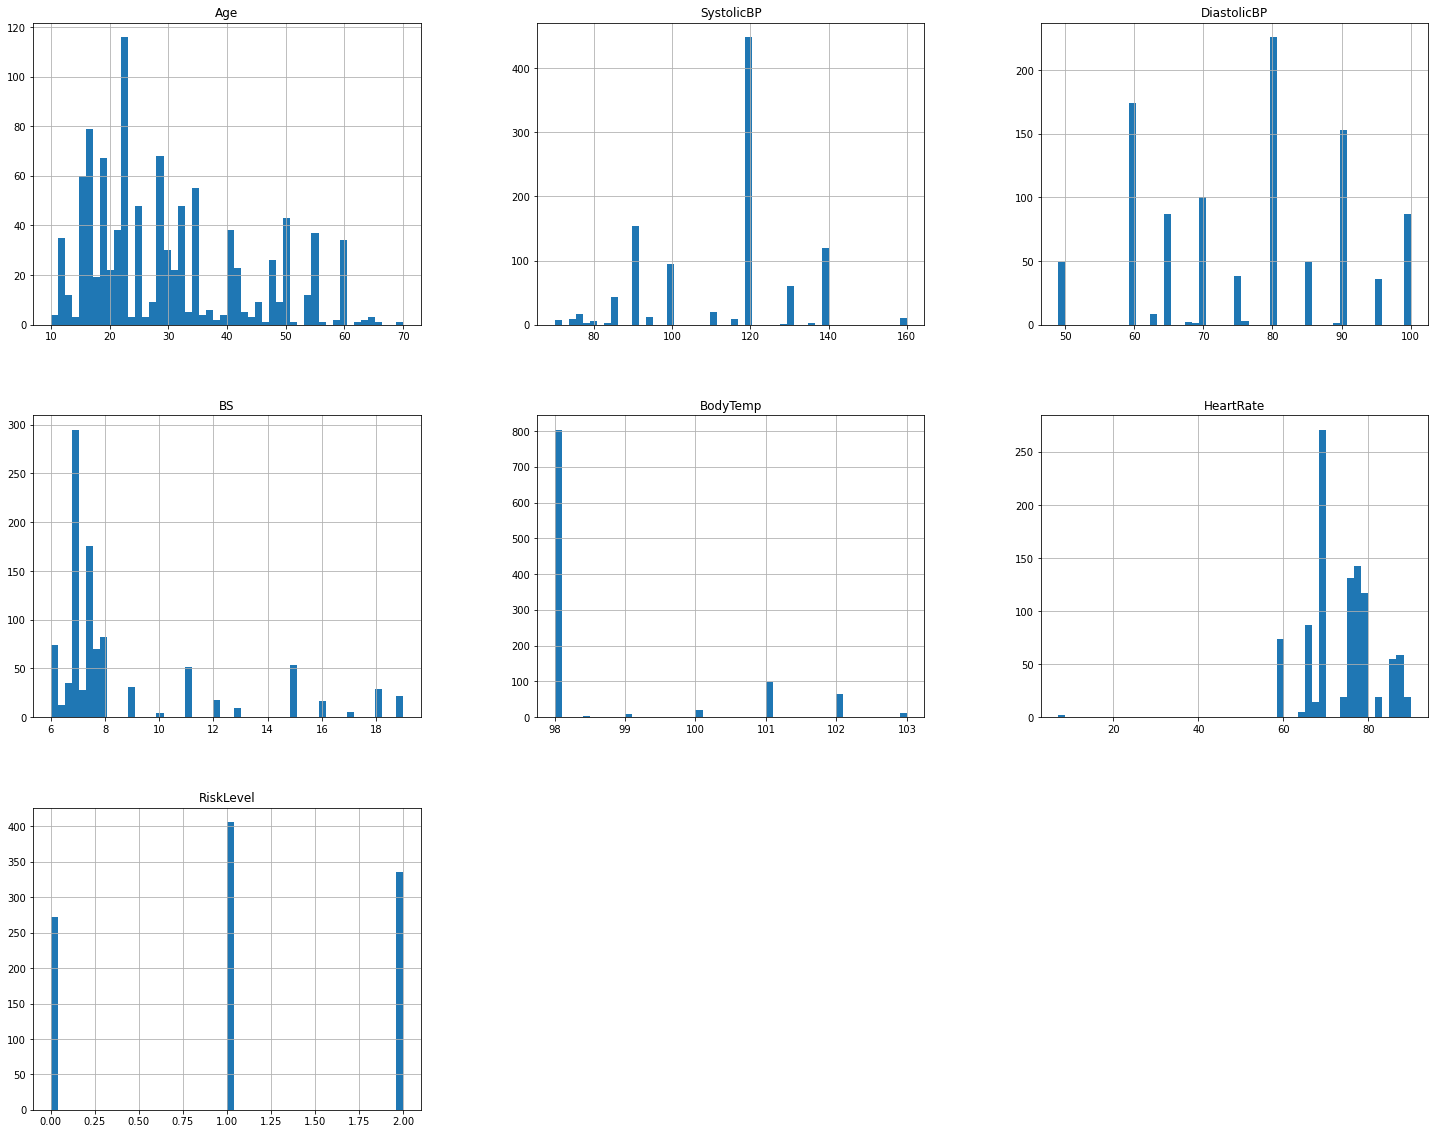

In [ ]:
Pregnency_dataset.hist(bins=50, figsize=(25, 20))
plt.show()

Removing buplicate data points

In [ ]:
Pregnency_dataset.drop_duplicates(keep='first', inplace=True)

Creating a test set


In [ ]:
original_train_Pregnency_dataset, test_Pregnency_dataset = train_test_split(Pregnency_dataset, test_size=0.2)

# To be sure we will create a copy for further processing
train_Pregnency_dataset = original_train_Pregnency_dataset.copy()

Gaining further insight
To further improve our understanding of the dataset
A 'total positive linear correlation' means that as X increases, Y increases. A 'total negative linear correlation' means that as X increases, Y decreases.

In [ ]:
correlation_matrix = train_Pregnency_dataset.corr(method='pearson')

correlation_matrix

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.348237,0.332328,0.359326,-0.172123,0.113302,-0.167271
SystolicBP,0.348237,1.000000,0.799578,0.355704,-0.214738,0.029159,-0.180902
DiastolicBP,0.332328,0.799578,1.000000,0.306157,-0.223461,-0.005737,-0.189429
BS,0.359326,0.355704,0.306157,1.000000,-0.041493,0.195871,-0.442471
BodyTemp,-0.172123,-0.214738,-0.223461,-0.041493,1.000000,0.030796,-0.103581
HeartRate,0.113302,0.029159,-0.005737,0.195871,0.030796,1.000000,-0.129215
RiskLevel,-0.167271,-0.180902,-0.189429,-0.442471,-0.103581,-0.129215,1.000000


In [ ]:
#Let's take a look at how each attribute correlates with the final diagnosis

correlation_matrix["RiskLevel"].sort_values()


BS            -0.442471
DiastolicBP   -0.189429
SystolicBP    -0.180902
Age           -0.167271
HeartRate     -0.129215
BodyTemp      -0.103581
RiskLevel      1.000000
Name: RiskLevel, dtype: float64

Handling missing data


In [ ]:
names = ['Age', 'SystolicBP', 'DiastolicBP', 'BodyTemp', 'HeartRate', 'BS']

for name in names:
    train_Pregnency_dataset[name].replace(0, np.nan, inplace=True)

In [ ]:
train_Pregnency_dataset
#no missing data found

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
306,12,120,95,6.9,98.0,60,1
322,65,90,60,6.9,98.0,70,1
157,40,120,90,12.0,98.0,80,0
454,32,120,80,6.8,98.0,70,2
461,23,90,60,6.8,98.0,76,1
...,...,...,...,...,...,...,...
86,21,120,80,6.9,98.0,76,2
319,35,85,60,19.0,98.0,86,0
25,16,100,70,7.2,98.0,80,1
495,42,120,80,7.9,98.0,70,1


Rescaling or standardizing attributes


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# initialize min-max scaler
mm_scaler = MinMaxScaler()

temp1_Pregnency_dataset = train_Pregnency_dataset.copy()
column_names = temp1_Pregnency_dataset.columns.tolist()

# transform all attributes
temp1_Pregnency_dataset[column_names] = mm_scaler.fit_transform(temp1_Pregnency_dataset[column_names])

temp1_Pregnency_dataset.sort_index(inplace=True)
temp1_Pregnency_dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1,0.416667,0.777778,0.803922,0.538462,0.0,0.333333,0.0
2,0.316667,0.222222,0.411765,0.153846,0.4,0.666667,0.0
3,0.333333,0.777778,0.705882,0.076923,0.0,0.333333,0.0
5,0.216667,0.777778,0.607843,0.077692,0.0,0.333333,0.0
6,0.216667,0.666667,0.411765,0.077692,0.0,0.600000,1.0


standardization

In [ ]:

standard_scaler = StandardScaler()

temp2_Pregnency_dataset = train_Pregnency_dataset.copy()

# transform all attributes
temp2_Pregnency_dataset[column_names] = mm_scaler.fit_transform(temp2_Pregnency_dataset[column_names])
temp2_Pregnency_dataset.sort_index(inplace=True)
temp2_Pregnency_dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1,0.416667,0.777778,0.803922,0.538462,0.0,0.333333,0.0
2,0.316667,0.222222,0.411765,0.153846,0.4,0.666667,0.0
3,0.333333,0.777778,0.705882,0.076923,0.0,0.333333,0.0
5,0.216667,0.777778,0.607843,0.077692,0.0,0.333333,0.0
6,0.216667,0.666667,0.411765,0.077692,0.0,0.600000,1.0


NORMALIZATION

Install feature selection
auto selection

In [ ]:
pip install featurewiz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1014, 6) (811, 6) (203, 6)


In [ ]:
# separating the data and labels
X = Pregnency_dataset.drop(columns = 'RiskLevel', axis=1)
Y = Pregnency_dataset['RiskLevel']

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

svm linear

[[18  4  6]
 [ 3 43 15]
 [ 2  0  0]]
              precision    recall  f1-score   support

           0       0.78      0.64      0.71        28
           1       0.91      0.70      0.80        61
           2       0.00      0.00      0.00         2

    accuracy                           0.67        91
   macro avg       0.57      0.45      0.50        91
weighted avg       0.85      0.67      0.75        91

Accuracy score of the training data :  0.6814404432132964
Accuracy score of the test data :  0.6703296703296703
recall= 0.4492583918813427
precision= 0.5658341042244835
f1= 0.5007262164124909
mse= 0.5934065934065934
mae= 0.4175824175824176
rmse= 0.7703288865196433


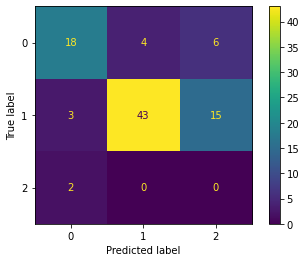

In [ ]:
#svm classifier

classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


#confusion matrix calculation
cm = confusion_matrix(X_test_prediction, Y_test)
print(cm)

cm_display = ConfusionMatrixDisplay(cm).plot()
# all score of confusion matrix
print(metrics.classification_report(X_test_prediction, Y_test))


#accuracy score of training data
print('Accuracy score of the training data : ', training_data_accuracy)


#accuracy score of test data
print('Accuracy score of the test data : ', test_data_accuracy)



#import result of recall
recall=metrics.recall_score(X_test_prediction, Y_test, average="macro")

#import result of precesion
pre=metrics.precision_score(X_test_prediction, Y_test, average="macro")


#import result of f1
f1=metrics.f1_score(X_test_prediction, Y_test, average="macro")

print('recall=',recall)
print('precision=',pre)
print('f1=',f1)








#import result of mse
print("mse=",metrics.mean_squared_error(X_test_prediction, Y_test))

#import result of mae
print("mae=",metrics.mean_absolute_error(X_test_prediction, Y_test))

#import result of rmse
print("rmse=",np.sqrt(metrics.mean_squared_error(X_test_prediction, Y_test)))



svm for rbf

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

ss = StandardScaler()

X_train = ss.fit_transform(X_train)

X_test= ss.transform(X_test)



Train accuracy: 0.7063711911357341
Test accuracy: 0.7472527472527473
[0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0
 0 0 1 1 0 2 1 1 1 1 1 0 2 0 0 1 1 0 1 1 0 2 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 1 0 1 0 1 1 2 0 1 0 1 1 1 1 0 1 1]
CM: [[24  4  1]
 [ 0 43  2]
 [ 4 12  1]]
Accuracy: 74.72527472527473 %
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.73      0.96      0.83        45
           2       0.25      0.06      0.10        17

    accuracy                           0.75        91
   macro avg       0.61      0.61      0.59        91
weighted avg       0.68      0.75      0.70        91

recall= 0.6139884306212907
precision= 0.6119854721549637
f1= 0.5880888117730222
mse= 0.4175824175824176
mae= 0.3076923076923077
rmse= 0.646206172658864


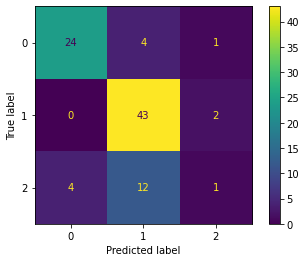

In [ ]:
from sklearn.svm import SVC

#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, y_train)


print("Train accuracy:",svm.score(X_train,y_train))
print("Test accuracy:",svm.score(X_test,y_test))



y_pred = svm.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')



print(metrics.classification_report(y_test, svm.predict(X_test)))


#import result of recall
recall=metrics.recall_score(y_test, y_pred, average="macro")

#import result of precesion
pre=metrics.precision_score(y_test, y_pred, average="macro")


#import result of f1
f1=metrics.f1_score(y_test, y_pred, average="macro")

print('recall=',recall)
print('precision=',pre)
print('f1=',f1)





cm_display = ConfusionMatrixDisplay(cm).plot()
# all score of confusion matrix




#import result of mse
print("mse=",metrics.mean_squared_error(y_test, y_pred))

#import result of mae
print("mae=",metrics.mean_absolute_error(y_test, y_pred))

#import result of rmse
print("rmse=",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



xai 

In [ ]:
pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
pip install Explainer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
explainer = shap.Explainer (svm)

TypeError: ignored